<BR>

<BR> 

***  

<BR>


<BR>

# Проект - Анализ рекламных источников 

<BR>

#### Заказчик

Трафик менеджеры, маркетингово отдела мобильной игры «Космические братья».  
Игра недавно вышла на рынок и уже пользуется большой популярностью.  
Основная монетизация игры — только планируется.  


<BR>

#### Задача

На основе данных понять, какую модель монетизации стоит выбрать для игрового приложения.  

- Провести исследовательский анализ данных
- Проанализировать влияние источника перехода в игру на поведение пользователя
- Проверить статистические гипотезы
- Сформулировать основные выводы и разработать рекомендации по рекламным источникам



<BR>

#### Материалы <a id='section_id_555'></a>

 - презентация -  https://drive.google.com/file/d/17i4I6neo8NC2vHYnVmYyKO8JkdJQl-4R/view?usp=sharing 
 - дашборд     -  https://public.tableau.com/profile/.34242135#!/vizhome/project_final_16167785513610/Dashboard1?publish=yes   


<BR>  <a id='section_id_0'></a>
    
<BR>    

**План**

  
- [1. Исследовательский анализ данных](#section_id_4)  
   - 1.1. Загрузка данных 
   - 1.2. Общая информация  
   - 1.3. Предобработка
- [2. Анализ данных](#section_id_5)  
   - 2.1. Общий анализ
   - 2.2. Распределение построек по времени
   - 2.3. Распределение пользователей по времени по рекламным источникам
   - 2.4. Retention Rate
   - 2.5. Рекламные источники
   - 2.6. Анализ игрового баланса
   - 2.7. Влияние источника трафика рекламы на прохождение уровня
   - 2.8. Влияние источника трафика рекламы на стратегию прохождения уровня
- [3. Статистические гипотезы](#section_id_6)  
  - 3.1. Время завершения уровня различается в зависимости от способа прохождения 
  - 3.2. Время завершения уровня различается в зависимости от источника перехода  
- [4. Выводы и рекомендации](#section_id_7)  


<BR>

**Описание данных**

Датасет `game_actions.csv`:
  
- **event_datetime** — время события  
- **event** — одно из трёх событий:  
    - building — объект построен  
    - finished_stage_1 — первый уровень завершён  
    - project — проект завершён  
- **building_typev** — один из трёх типов здания:  
    - assembly_shop — сборочный цех  
    - spaceport — космопорт  
    - research_center — исследовательский центр  
- **user_id** — идентификатор пользователя  
- **project_type** — тип реализованного проекта  

Датасет `ad_cost.csv`:

- **day** - день, в который был совершен клик по объявлению
- **source** - источник трафика
- **cost** - стоимость кликов

Датасет `user_source.csv` содержит колонки:

- **user_id** - идентификатор пользователя
- **source** - источников, с которого пришёл пользователь, установивший приложение

<BR>

<BR> <a id='section_id_4'></a>

***  

<BR>


# 1. Исследовательский анализ данных  

## 1.1. Загрузка данных <a id='section_id_1'></a>

### импорт библиотек

In [1]:
import pandas as pd
import numpy as np

from io import BytesIO
import requests

from scipy import stats as st
import math as mth

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go

sns.set()
sns.set_style("darkgrid")

### выгрузка данных 

#### game_actions

In [2]:
id = 'https://docs.google.com/spreadsheets/d/1iJxElT_ZL5kGoDXMMlAHdpAI_CF90P2OXzkSgK6WesE/edit?usp=sharing'.split('/')[5]

In [3]:
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(id)

In [4]:
r = requests.get(file_name)

In [5]:
game_actions = pd.read_csv(BytesIO(r.content))

In [6]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


#### ad_costs

In [7]:
id = 'https://docs.google.com/spreadsheets/d/1zVwONRYnO2Pg7T-lLbzfalr64sx3WZ0E2a05Tg380E8/edit?usp=sharing'.split('/')[5]

In [8]:
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(id)

In [9]:
r = requests.get(file_name)

In [10]:
ad_costs = pd.read_csv(BytesIO(r.content))

In [11]:
ad_costs.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


#### user_source

In [12]:
id = 'https://docs.google.com/spreadsheets/d/1jGLpyNX_DS670ke4WVjcxMS7dMmsIsFyKfrU-osB4YA/edit?usp=sharing'.split('/')[5]

In [13]:
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(id)

In [14]:
r = requests.get(file_name)

In [15]:
user_source = pd.read_csv(BytesIO(r.content))

In [16]:
user_source.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


[План](#section_id_0) 


## 1.2. Общая информация <a id='section_id_2'></a>

### game_actions

In [17]:
game_actions.head(5)

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


заголовки написаны латиницей в нижнем регистре

In [18]:
game_actions.shape

(135640, 5)

In [19]:
game_actions.dtypes

event_datetime    object
event             object
building_type     object
user_id           object
project_type      object
dtype: object

столбец **event_datetime** не соответствует типу данных дата

In [20]:
game_actions.isna().mean()

event_datetime    0.000000
event             0.000000
building_type     0.056643
user_id           0.000000
project_type      0.986243
dtype: float64

есть пропуски в **building_type**, и очень много пропусков (98%) в **project_type**

In [21]:
game_actions.duplicated().sum()

1

есть один дубликат

In [22]:
game_actions['event'].value_counts(dropna=False)

building            127957
finished_stage_1      5817
project               1866
Name: event, dtype: int64

есть три типа событий;  
чаще всего встречается *building* ("постройка обьекта") - 127957 раз;

In [23]:
game_actions['building_type'].value_counts(dropna=False)

spaceport          59325
assembly_shop      54494
research_center    14138
NaN                 7683
Name: building_type, dtype: int64

In [24]:
game_actions['building_type'].count()

127957

есть три типа постройки;  
есть пропуски - 7683;  
количество всех строений равно всем упоминаниям события *building* из столбца **event** - 127957

In [25]:
game_actions['user_id'].count()

135640

In [26]:
game_actions['user_id'].nunique()

13576

количество уникальных пользователей **13576** человек

In [27]:
game_actions['project_type'].value_counts(dropna=False)

NaN                           133774
satellite_orbital_assembly      1866
Name: project_type, dtype: int64

имется только одно событие, **1866** реализованных проекта - "разработка орбитальной сборки спутников" - что соответствует всем упоминаниям события *project* столбца **event**

  
- в таблице **game_actions** есть пропуски, но они логически обоснованны  
- есть один дубликат  
- так же не обходимо заменить тип данных в столбце **event_datetime**

### ad_costs

In [28]:
ad_costs.head(5)

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [29]:
ad_costs.shape

(28, 3)

In [30]:
ad_costs.dtypes

source     object
day        object
cost      float64
dtype: object

тип данных в **day** привести к типу данных дата

In [31]:
ad_costs.isna().mean()

source    0.0
day       0.0
cost      0.0
dtype: float64

пропусков нет

In [32]:
ad_costs.duplicated().sum()

0

дубликатов нет

In [33]:
ad_costs['source'].value_counts()

facebook_ads               7
youtube_channel_reklama    7
instagram_new_adverts      7
yandex_direct              7
Name: source, dtype: int64

имеем четыре источника рекламы

In [34]:
ad_costs['cost'].describe()

count     28.000000
mean     271.556321
std      286.867650
min       23.314669
25%       66.747365
50%      160.056443
75%      349.034473
max      969.139394
Name: cost, dtype: float64

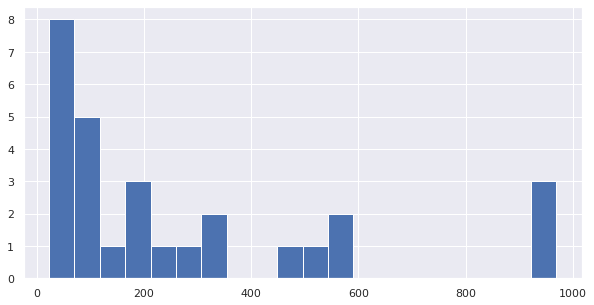

In [35]:
ad_costs['cost'].hist(figsize=(10,5),bins=20);

**cost** это стоимость кликов различных источников рекламы, в различные дни;  
минимальная стоимость клика 23 у.е.;  
максимальная стоимость клика 969 у.е.;  
среднее и медиана 271 и 160 соответственно, со стандарнтным отклонением 286 у.е.;  
разброс не однороден, наблюдений всего 28, это слишком мало, что бы делать какие либо выводы

- в таблице **ad_costs** пропусков нет   
- заменить тип данных в столбце **day** на тип данных даты

### user_source

In [36]:
user_source.head(5)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [37]:
user_source.shape

(13576, 2)

In [38]:
user_source.dtypes

user_id    object
source     object
dtype: object

In [39]:
user_source.isna().mean()

user_id    0.0
source     0.0
dtype: float64

In [40]:
user_source.duplicated().sum()

0

In [41]:
user_source['user_id'].nunique()

13576

в таблице **user_source** все пользователи уникальны  
это количество соответствует количеству уникальных пользователей в таблице **game_actions**

In [42]:
user_source['source'].value_counts(dropna=False)

yandex_direct              4817
instagram_new_adverts      3347
facebook_ads               2726
youtube_channel_reklama    2686
Name: source, dtype: int64

имеем четыре источника рекламы

- дубликатов в таблице нет  
- пропусков нет  
- типы данных впорядке

[План](#section_id_0) 

## 1.3. Предобработка <a id='section_id_3'></a>

### типы данных

In [43]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])

In [44]:
game_actions['event_date'] = game_actions['event_datetime'].dt.date.astype('datetime64')

In [45]:
game_actions.dtypes

event_datetime    datetime64[ns]
event                     object
building_type             object
user_id                   object
project_type              object
event_date        datetime64[ns]
dtype: object

таблица **game_actions**, столбец ***event_datetime***, тип данных привели к datetime64[ns]  
вывели отдельно дату из стобца ***event_datetime*** в отдельный столбец ***event_date***

In [46]:
ad_costs['day'] = pd.to_datetime(ad_costs['day'])

In [47]:
ad_costs.dtypes

source            object
day       datetime64[ns]
cost             float64
dtype: object

### дубликаты

In [48]:
game_actions[game_actions.duplicated(keep=False)]

,event_datetime,event,building_type,user_id,project_type,event_date
74890,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN,2020-05-10
74891,2020-05-10 18:41:56,building,research_center,c9af55d2-b0ae-4bb4-b3d5-f32aa9ac03af,NaN,2020-05-10


строка продублировалась полностью, похоже на техническую ошибку; один дубликат можно удалить

In [49]:
game_actions = game_actions.drop_duplicates()
game_actions.duplicated().sum()

0

- типы данных в столбцах с датой преведы к типу *datetime64[ns]*  
- пропусков нет  
- дубликатов нет
- заголовки впорядке
- можно приступать к анализу

[План](#section_id_0) 

<BR> <a id='section_id_5'></a>

***  

<BR>


# 2. Анализ данных 

## 2.1. Общий анализ <a id='section_id_51'></a>

In [50]:
print('Общее количество пользователей:', game_actions['user_id'].count())
print('Кол-во уникальных пользователей:', game_actions['user_id'].nunique())

Общее количество пользователей: 135639
Кол-во уникальных пользователей: 13576


In [51]:
display(game_actions['event_datetime'].min())
display(game_actions['event_datetime'].max())

Timestamp('2020-05-04 00:00:01')

Timestamp('2020-06-05 12:32:49')

данные в таблице **game_actions** представлены с 4 мая 2020 года по 5 июня 2020 года

In [52]:
display(ad_costs['day'].min())
display(ad_costs['day'].max())

Timestamp('2020-05-03 00:00:00')

Timestamp('2020-05-09 00:00:00')

данные в таблице **ad_costs** представлены с 3 мая 2020 года по 9 мая 2020 года, реклама закупалась всего 6 дней;  
приложением начали пользоваться в период с 4 по 10 мая включительно;  
судя по данным, реклама покупалась за день до предоставленных в таблице **game_actions** логов

[План](#section_id_0) 


## 2.2. Распределение построек по времени <a id='section_id_52'></a>

In [53]:
buildingtype = game_actions.groupby(['event_date', 'building_type'])['user_id']. \
                            count(). \
                            reset_index(). \
                            rename({'user_id':'count'}, axis=1)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



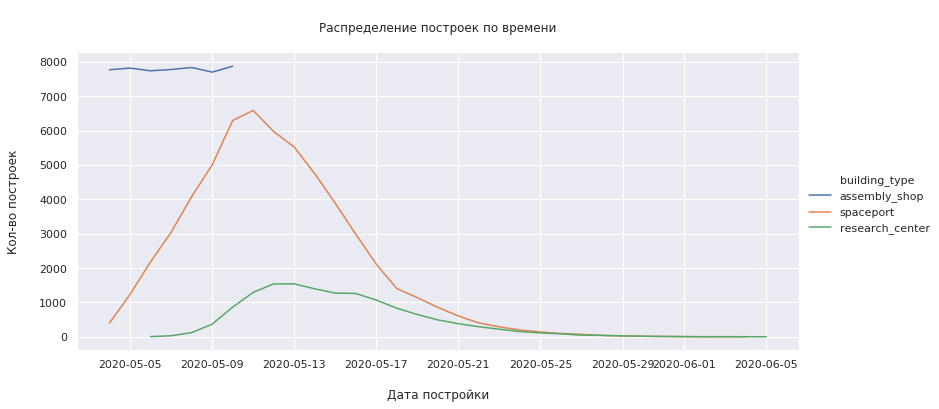

In [54]:
sns.relplot(data=buildingtype, x='event_date', y='count', hue='building_type', kind='line', aspect=18/8)
plt.title('\nРаспределение построек по времени\n')
plt.ylabel('Кол-во построек\n')
plt.xlabel('\nДата постройки');

постройка `assembly_shop`, скорее всего строится игроками в первую очередь и недолго;  
параллельно `assembly_shop` наблюдаем восходящий тренд строительства `spaceport`, на пике которого `assembly_shop` обрывается;  
скорее всего постройку `assembly_shop` больше нельзя построить, после строительства `spaceport`;  
`research_center` впервые строят спустя пару дней, основная масса игроков делает это спустя +/- неделю;  
  
можно наблюдать общий спад активности строительства;  
это может говорить о том, что либо пользователи остановились в прогрессе и ушели, либо перешели на следующий уровень

[План](#section_id_0) 


## 2.3. Распределение пользователей по времени по рекламным источникам <a id='section_id_53'></a>

In [55]:
events = game_actions.merge(user_source, how='left', on='user_id')

In [56]:
events_groupby = events.groupby(['event_date', 'source'])['user_id'].\
                        nunique().\
                        reset_index().\
                        rename({'user_id':'count'}, axis=1)

In [57]:
events_groupby

,event_date,source,count
0,2020-05-04,facebook_ads,1184
1,2020-05-04,instagram_new_adverts,1452
2,2020-05-04,yandex_direct,2078
3,2020-05-04,youtube_channel_reklama,1146
4,2020-05-05,facebook_ads,1328
...,...,...,...
126,2020-06-04,yandex_direct,3
127,2020-06-05,facebook_ads,1
128,2020-06-05,instagram_new_adverts,1
129,2020-06-05,yandex_direct,1


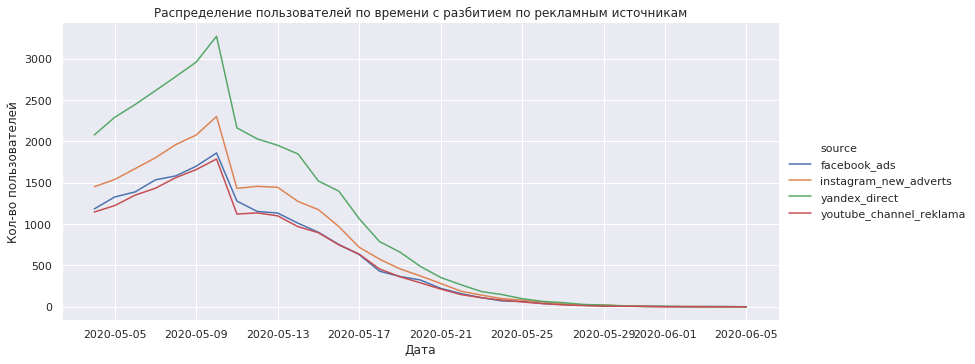

In [58]:
sns.relplot(data=events_groupby, x='event_date', y='count', hue='source', kind='line', aspect=18/8)
plt.title('Распределение пользователей по времени с разбитием по рекламным источникам')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Дата');

реклама была дана первую неделю, поэтому в начале можно наблюдать рост пользователей с пиком в конце недели;  
резкий спад новых пользователей обусловлен остановкой рекламы;  

далее наблюдается низходящий тренд,  
так как в нашем датасете представлены данные по игре пользователей на первом уровне,  
падающие показатели можно объяснить переходом пользователей на новый уровень, либо прекращением активности.

[План](#section_id_0) 


## 2.4. Retention Rate <a id='section_id_54'></a>

Для расчета удержания, возьмем дату, когда пользователь впервые проявил активность, присоединим к исходной таблице **game_actions** и сохраним в новый датафрейм **user_activity**

In [59]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,event_date
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04


In [60]:
first_activity_date = game_actions.groupby(['user_id'])['event_date'].min()

In [61]:
first_activity_date.name = 'first_activity_date'

In [62]:
user_activity = game_actions.join(first_activity_date,on='user_id')

рассчитаем lifetime пользователя в рамках когорты

In [63]:
user_activity['cohort_lifetime'] = ((user_activity['event_date'] - user_activity['first_activity_date']) 
                                    / np.timedelta64(1,'W')).round().astype(int)

In [64]:
user_activity.sample(5)

,event_datetime,event,building_type,user_id,project_type,event_date,first_activity_date,cohort_lifetime
21381,2020-05-06 10:18:24,building,assembly_shop,6956965f-d464-4978-8dd8-d8bcd4f8abca,NaN,2020-05-06,2020-05-06,0
124928,2020-05-18 07:40:55,finished_stage_1,NaN,7b300645-e902-4b7d-a5cf-ac75a9a0fced,NaN,2020-05-18,2020-05-06,2
87168,2020-05-12 01:41:04,building,spaceport,29b73b1d-8142-4214-b8d3-ba321ae5d776,NaN,2020-05-12,2020-05-04,1
57513,2020-05-09 14:02:31,building,spaceport,f4e97d63-5a09-4755-8a18-6c0b8e4b9fea,NaN,2020-05-09,2020-05-04,1
30741,2020-05-07 08:02:57,building,spaceport,0483b56f-68a1-4d27-a296-c7a5af39da18,NaN,2020-05-07,2020-05-04,0


cгруппируем данные по когорте и lifetime

In [65]:
cohorts = user_activity.groupby(['first_activity_date', 'cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()

найдем исходное кол-во пользователей в когорте и переименуем в cohort_users

In [66]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_date','user_id']]

In [67]:
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})

объеденим данные по когортам с исходным кол-вом пользователей в когорте

In [68]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_date')

рассчитаем retention rate 

In [69]:
cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_users']

In [70]:
retention_pivot = cohorts.pivot_table(index='first_activity_date',
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='sum')

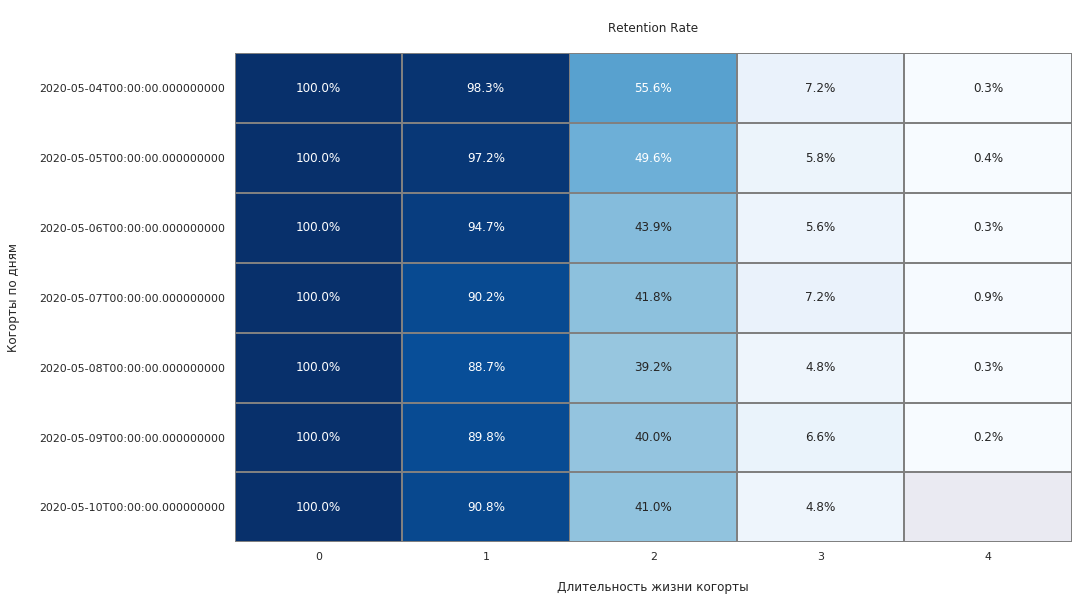

In [71]:
plt.figure(figsize=(15, 9))
plt.title('\nRetention Rate\n')
ax = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap="Blues", cbar=False)
ax.set_ylabel('Когорты по дням\n')
ax.set_xlabel('\nДлительность жизни когорты');

по тепловой карте видно, что удержание пользователей на 3ей неделе снизилось в 2 раза, а к концу 5ой недели упало до 0%  
  
так как в нашем датасете представлены данные по игре пользователей на первом уровне  
снижение **retention** можно объяснить двояко, либо это переход пользователей на новый уровень, либо прекращение активности

[План](#section_id_0) 


***

## 2.5. Рекламные источники <a id='section_id_55'></a>

### расходы на каждый рекламный источник

In [72]:
ad_costs.groupby('source')['cost'].sum().sort_values(ascending=False).reset_index()

,source,cost
0,yandex_direct,2233.111449
1,instagram_new_adverts,2161.441691
2,facebook_ads,2140.904643
3,youtube_channel_reklama,1068.119204


расходы на рекламу по источникам распределены примерно одинаково,  
кроме `youtube`, на него было потрачено вдвое меньше, чем на какой либо другой источник

### сколько пользователей привлек каждый рекламный источник

In [73]:
source_current = user_source.groupby('source').agg({'user_id':'nunique'})

In [74]:
source_current.sort_values(by='user_id', ascending=False, inplace=True)

In [75]:
source_current

,user_id
source,
yandex_direct,4817
instagram_new_adverts,3347
facebook_ads,2726
youtube_channel_reklama,2686


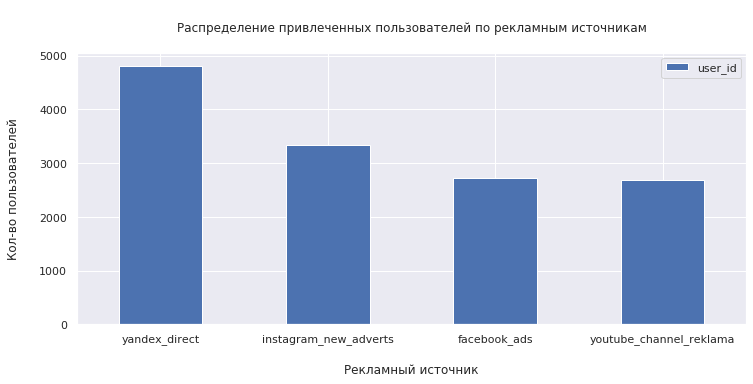

In [76]:
source_current.plot(kind='bar', figsize=(12,5), grid=True)
plt.title('\nРаспределение привлеченных пользователей по рекламным источникам\n')
plt.ylabel('Кол-во пользователей\n')
plt.xlabel('\nРекламный источник')
plt.xticks(rotation=0);

больше всех привлек `yandex` - 4800 пользователя  
остальные источники привлекли по 3000 +/- пользователей


### расходы по дням

In [77]:
ad_costs.pivot_table(index='source', 
                     columns='day', 
                     values='cost', 
                     aggfunc='sum', 
                     margins=True, 
                     margins_name='total')

day,2020-05-03 00:00:00,2020-05-04 00:00:00,2020-05-05 00:00:00,2020-05-06 00:00:00,2020-05-07 00:00:00,2020-05-08 00:00:00,2020-05-09 00:00:00,total
source,,,,,,,,
facebook_ads,935.882786,548.354480,260.185754,177.982200,111.766796,68.009276,38.723350,2140.904643
instagram_new_adverts,943.204717,502.925451,313.970984,173.071145,109.915254,71.578739,46.775400,2161.441691
yandex_direct,969.139394,554.651494,308.232990,180.917099,114.429338,62.961630,42.779505,2233.111449
youtube_channel_reklama,454.224943,259.073224,147.041741,88.506074,55.740645,40.217907,23.314669,1068.119204
total,3302.451840,1865.004649,1029.431469,620.476519,391.852033,242.767553,151.592924,7603.576987


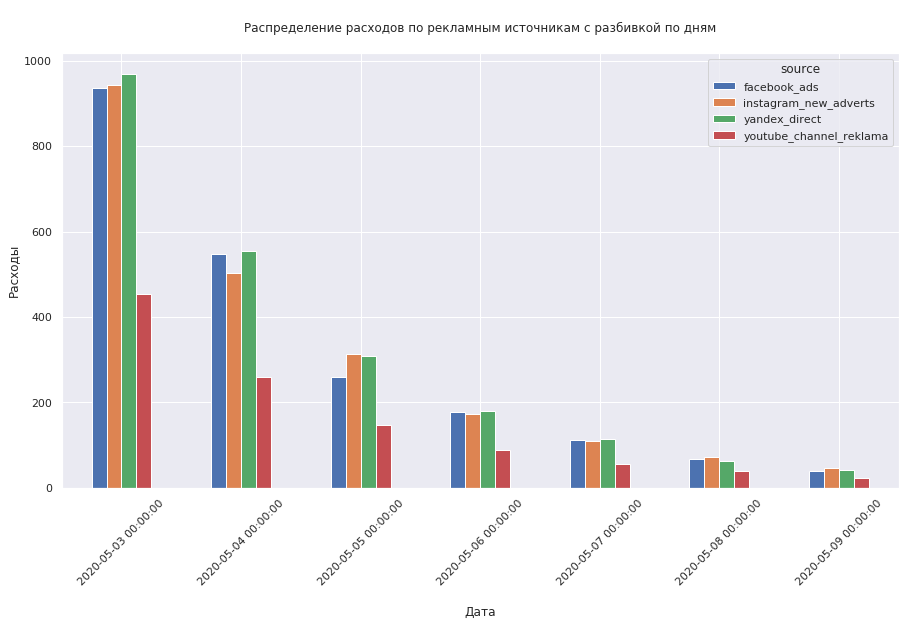

In [78]:
ad_costs_pivot = ad_costs.pivot_table(index='source', columns='day', values='cost', aggfunc='sum')
ad_costs_pivot.T.plot(kind='bar', figsize=(15,8), grid=True)
plt.title('\nРаспределение расходов по рекламным источникам c разбивкой по дням\n')
plt.ylabel('Расходы')
plt.xlabel('\nДата')
plt.xticks(rotation=45);

в первый день на закупку рекламы в общем было потрачено 3302 у.е., далее в течение недели траты снижались, вплоть до 151 у.е. 

### CAC (стоимость привлечения клиента)

In [79]:
source_cost = ad_costs.groupby('source')['cost'].sum().round().reset_index()
source_cost

,source,cost
0,facebook_ads,2141.0
1,instagram_new_adverts,2161.0
2,yandex_direct,2233.0
3,youtube_channel_reklama,1068.0


In [80]:
source_count = user_source.groupby('source')['user_id'].nunique().reset_index().rename({'user_id':'count'}, axis=1)
source_count

,source,count
0,facebook_ads,2726
1,instagram_new_adverts,3347
2,yandex_direct,4817
3,youtube_channel_reklama,2686


In [81]:
cac = source_cost.merge(source_count, how='inner', on= 'source')

In [82]:
cac['cac'] = (cac['cost'] / cac['count']).round(2)

In [83]:
cac

,source,cost,count,cac
0,facebook_ads,2141.0,2726,0.79
1,instagram_new_adverts,2161.0,3347,0.65
2,yandex_direct,2233.0,4817,0.46
3,youtube_channel_reklama,1068.0,2686,0.40


Больше всего потратили на источник `yandex_direct` (2233 у.е.)  
Самый высокий показатель САС у `facebook_ads` (0.79 у.e.)  
Меньше всего потратили на источник `youtube_channel_reklama` , у него же наименьший САС (0.40 у.е.)


***  
  

[План](#section_id_0) 


## 2.6. Анализ игрового баланса <a id='section_id_56'></a>

### Время, за которое пользователесь завершает уровень

In [84]:
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,event_date
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04


In [85]:
# первое событие для пользователя
first_user_event = game_actions.groupby('user_id')['event_datetime']\
                               .min()\
                               .reset_index()\
                               .rename(columns={'event_datetime':'first_event'})
first_user_event.head(1)

,user_id,first_event
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37


In [86]:
first_user_event.shape

(13576, 2)

In [87]:
# последнее событие для пользователя
last_user_event = game_actions.groupby('user_id')['event_datetime']\
                              .max()\
                              .reset_index()\
                              .rename(columns={'event_datetime':'last_event'})
last_user_event.head(1)

,user_id,last_event
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-20 11:26:06


In [88]:
last_user_event.shape

(13576, 2)

In [89]:
# все события совершенные пользователями с датой
events_for_users = game_actions[['user_id', 'event_datetime', 'event']]
events_for_users.shape

(135639, 3)

In [90]:
# пользователи завершившие главный проект
user_project_type = game_actions[['user_id', 'project_type']].query('project_type == "satellite_orbital_assembly"')
user_project_type.shape

(1866, 2)

соединяем таблицы

In [91]:
users_first_last_event = first_user_event.merge(last_user_event, how='left', on='user_id')
users_first_last_event.head(1)

,user_id,first_event,last_event
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06


In [92]:
users_first_last_event.shape

(13576, 3)

In [93]:
users_first_last_event = users_first_last_event.merge(events_for_users, 
                                                      how='left', 
                                                      left_on=['user_id', 'last_event'], 
                                                      right_on=['user_id', 'event_datetime'])
users_first_last_event.head(1)

,user_id,first_event,last_event,event_datetime,event
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,2020-05-20 11:26:06,building


In [94]:
users_first_last_event.shape

(13576, 5)

In [95]:
users_first_last_event = users_first_last_event.merge(user_project_type, how='left', on='user_id')\
                                               .drop('event_datetime', axis=1)
users_first_last_event.head(1)

,user_id,first_event,last_event,event,project_type
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,building,NaN


In [96]:
users_first_last_event.shape

(13576, 5)

заполним пропуски

In [97]:
users_first_last_event['project_type'] = users_first_last_event['project_type'].fillna('none')

выделим длительность между первым и последним действием

In [98]:
users_first_last_event['path_duration'] = users_first_last_event['last_event'] - users_first_last_event['first_event']

переведем длительность в дни

In [99]:
users_first_last_event['path_days'] = users_first_last_event['path_duration'].dt.days

In [100]:
users_first_last_event.head()

,user_id,first_event,last_event,event,project_type,path_duration,path_days
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,building,none,14 days 10:18:29,14
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52,building,none,12 days 07:37:40,12
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27,building,none,8 days 15:12:35,8
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,finished_stage_1,none,6 days 10:38:42,6
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,2020-05-22 02:46:45,building,none,16 days 12:56:47,16


### Пользователи, реализовавшие проект

In [101]:
who_made_project = users_first_last_event.query('project_type != "none"')
mean_project = round(who_made_project['path_days'].median())

print(f'Среднее время, за которое пользователь реализует проект: {mean_project} дней')
print('Кол-во пользователей, реализовавших проект: ', len(who_made_project))

Среднее время, за которое пользователь реализует проект: 13 дней
Кол-во пользователей, реализовавших проект:  1866


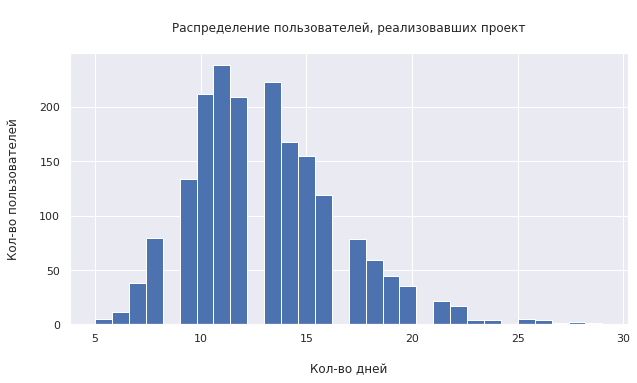

In [102]:
who_made_project.hist(bins='auto',figsize=(10,5))
plt.title('\nРаспределение пользователей, реализовавших проект\n')
plt.ylabel('Кол-во пользователей\n')
plt.xlabel('\nКол-во дней');

### Пользователи, победившие первого врага

In [103]:
who_made_victory = users_first_last_event.query('project_type == "none" and event == "finished_stage_1"')
mean_victory = round(who_made_victory['path_days'].median())

print(f'Среднее время, за которое пользователь совершает победу над первым врагом: {mean_victory} дней')
print('Кол-во пользователей, совершивших победу над первым врагом:', len(who_made_victory))

Среднее время, за которое пользователь совершает победу над первым врагом: 10 дней
Кол-во пользователей, совершивших победу над первым врагом: 3951


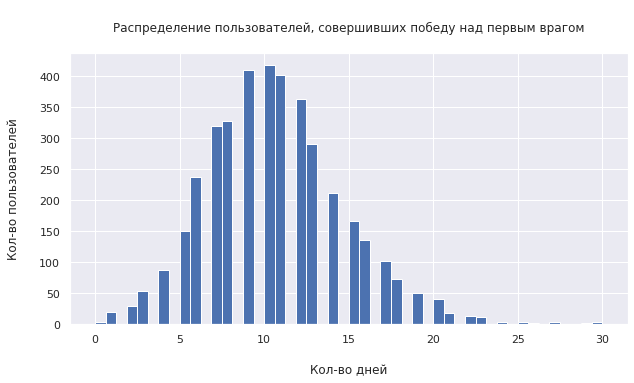

In [104]:
who_made_victory.hist(bins='auto', figsize=(10,5))
plt.title('\nРаспределение пользователей, совершивших победу над первым врагом\n')
plt.ylabel('Кол-во пользователей\n')
plt.xlabel('\nКол-во дней');

### Пользователи, непрошедшие первый уровень

In [105]:
who_lost_game = users_first_last_event.query('event == "building"')
mean_lost = round(who_lost_game['path_days'].median())

print(f'Среднее время, за которое пользователь останавливается в прогрессе: {mean_lost} дней')
print('Кол-во пользователей, непрошедшие первый уровень:', len(who_lost_game))

Среднее время, за которое пользователь останавливается в прогрессе: 9 дней
Кол-во пользователей, непрошедшие первый уровень: 7759


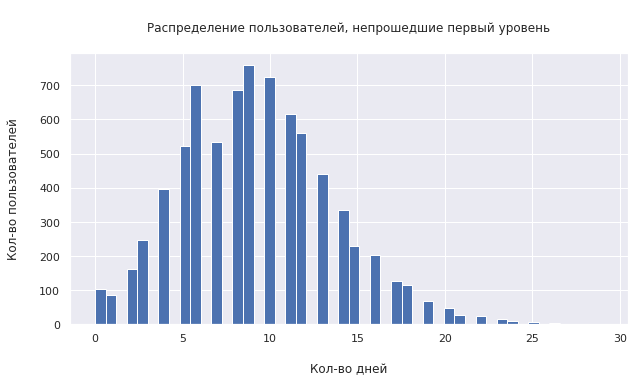

In [106]:
who_lost_game.hist(bins='auto', figsize=(10,5))
plt.title('\nРаспределение пользователей, непрошедшие первый уровень\n')
plt.ylabel('Кол-во пользователей\n')
plt.xlabel('\nКол-во дней');

### Сводная таблица

In [107]:
wlg_pivot = (who_lost_game
             .pivot_table(index='event', 
                          values=['user_id', 'path_days'], 
                          aggfunc={'user_id':'count', 'path_days':'mean'})
             .rename({'building':'who_lost_game'}, axis=0)
             .reset_index())
wlg_pivot

,event,path_days,user_id
0,who_lost_game,9.285475,7759


In [108]:
wmv_pivot = (who_made_victory
             .pivot_table(index='event', 
                          values=['user_id', 'path_days'], 
                          aggfunc={'user_id':'count', 'path_days':'mean'})
             .rename({'finished_stage_1':'who_made_victory'}, axis=0)
             .reset_index())
wmv_pivot

,event,path_days,user_id
0,who_made_victory,10.606176,3951


In [109]:
wmp_pivot = (who_made_project
             .pivot_table(index='event', 
                          values=['user_id', 'path_days'], 
                          aggfunc={'user_id':'count', 'path_days':'mean'})
             .rename({'finished_stage_1':'who_made_project'}, axis=0)
             .reset_index())
wmp_pivot

,event,path_days,user_id
0,who_made_project,12.963023,1866


In [110]:
who_concat = pd.concat([wlg_pivot, wmv_pivot, wmp_pivot]).reset_index(drop=True)

In [111]:
who_concat['path_days'] = round(who_concat['path_days'])

In [112]:
who_concat['%_of_total'] = (who_concat['user_id'] / who_concat['user_id'].sum()).round(2)

In [113]:
who_concat

,event,path_days,user_id,%_of_total
0,who_lost_game,9.0,7759,0.57
1,who_made_victory,11.0,3951,0.29
2,who_made_project,13.0,1866,0.14


In [114]:
who_concat[['event','%_of_total']].set_index('event')

,%_of_total
event,
who_lost_game,0.57
who_made_victory,0.29
who_made_project,0.14


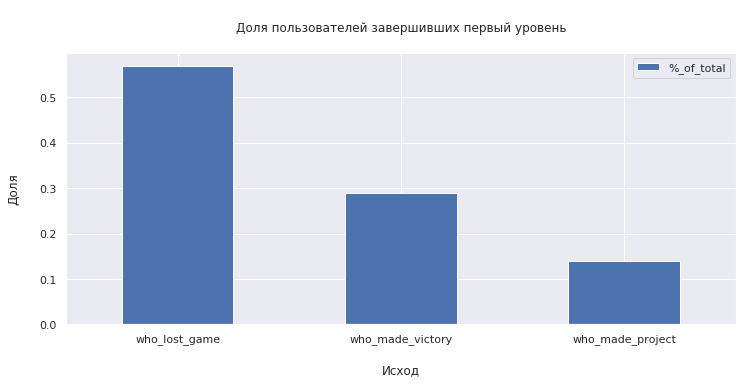

In [115]:
who_concat[['event','%_of_total']].set_index('event').plot(kind='bar', figsize=(12,5), grid=True)
plt.title('\nДоля пользователей завершивших первый уровень\n')
plt.ylabel('Доля\n')
plt.xlabel('\nИсход')
plt.xticks(rotation=0);

### Вывод

 - Большинство пользователей (57%) остановились в прогрессе и не прошли первый уровень
 - 29% пользователей прошли первый уровень победой над врагом
 - 14% выбрали путь реализации проекта
 - Только 43% пользователей прошли первый уровень

[План](#section_id_0) 

***

## 2.7. Влияние источника трафика рекламы на прохождение уровня  <a id='section_id_57'></a>

Добавим к таблице **users_first_last_event** таблицу с рекламными источниками, с которых пришли пользователи

In [116]:
users_first_last_event.head() 

,user_id,first_event,last_event,event,project_type,path_duration,path_days
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,building,none,14 days 10:18:29,14
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52,building,none,12 days 07:37:40,12
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27,building,none,8 days 15:12:35,8
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,finished_stage_1,none,6 days 10:38:42,6
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,2020-05-22 02:46:45,building,none,16 days 12:56:47,16


In [117]:
users_first_last_event = users_first_last_event.merge(user_source, on='user_id', how='left')

In [118]:
finished_by_source = users_first_last_event.query('event == "finished_stage_1"')\
                                           .groupby('source')['event']\
                                           .count()\
                                           .reset_index()
finished_by_source

,source,event
0,facebook_ads,1150
1,instagram_new_adverts,1466
2,yandex_direct,2042
3,youtube_channel_reklama,1159


Соединим таблицы **finished_by_source** и **source_current**

In [119]:
source_current

,user_id
source,
yandex_direct,4817
instagram_new_adverts,3347
facebook_ads,2726
youtube_channel_reklama,2686


In [120]:
source_current.reset_index(inplace=True)

In [121]:
source_merge = finished_by_source.merge(source_current, on='source', how='left')\
                                 .rename(columns={'event':'finished_users', 'user_id':'attracted_users'})

In [122]:
source_merge['%_of_finished'] = source_merge['finished_users'] / source_merge['attracted_users']

In [123]:
source_merge = source_merge.merge(cac).sort_values(by='%_of_finished', ascending=False)

In [124]:
source_merge

,source,finished_users,attracted_users,%_of_finished,cost,count,cac
1,instagram_new_adverts,1466,3347,0.438004,2161.0,3347,0.65
3,youtube_channel_reklama,1159,2686,0.431497,1068.0,2686,0.40
2,yandex_direct,2042,4817,0.423915,2233.0,4817,0.46
0,facebook_ads,1150,2726,0.421864,2141.0,2726,0.79


разницы в проценте прохождения первого уровня в зависимости от источника трафика нет;  
 

[План](#section_id_0) 

## 2.8. Влияние источника трафика рекламы на стратегию прохождения уровня

In [125]:
who_made_victory['strategy'] = 'victory'

In [126]:
who_made_victory

,user_id,first_event,last_event,event,project_type,path_duration,path_days,strategy
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,finished_stage_1,none,6 days 10:38:42,6,victory
6,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49,finished_stage_1,none,12 days 13:16:45,12,victory
7,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,2020-05-16 19:57:40,finished_stage_1,none,12 days 18:50:05,12,victory
9,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-04 08:35:29,2020-05-15 16:02:01,finished_stage_1,none,11 days 07:26:32,11,victory
10,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-10 11:49:47,2020-05-16 13:48:39,finished_stage_1,none,6 days 01:58:52,6,victory
...,...,...,...,...,...,...,...,...
13566,ffc6f4fa-3476-47af-85cb-e2ee0551110a,2020-05-04 03:59:12,2020-05-15 12:18:42,finished_stage_1,none,11 days 08:19:30,11,victory
13568,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,2020-05-06 06:34:18,2020-05-19 04:03:24,finished_stage_1,none,12 days 21:29:06,12,victory
13570,ffe810f4-1a1f-464b-924d-6f120b0cb8df,2020-05-04 17:46:05,2020-05-18 02:03:36,finished_stage_1,none,13 days 08:17:31,13,victory
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,2020-05-11 22:15:54,finished_stage_1,none,7 days 20:16:55,7,victory


In [127]:
who_lost_game['strategy'] = 'lost_game'

In [128]:
who_made_project['strategy'] = 'project'

In [129]:
source_to_strategy = who_made_victory.append(who_lost_game)

In [130]:
source_to_strategy = source_to_strategy.append(who_made_project)

In [131]:
source_to_strategy.shape

(13576, 8)

In [132]:
source_to_strategy = source_to_strategy.merge(user_source, how='inner',on='user_id')

In [133]:
source_to_strategy.shape

(13576, 9)

In [134]:
source_to_strategy.head(2)

,user_id,first_event,last_event,event,project_type,path_duration,path_days,strategy,source
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,finished_stage_1,none,6 days 10:38:42,6,victory,instagram_new_adverts
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49,finished_stage_1,none,12 days 13:16:45,12,victory,instagram_new_adverts


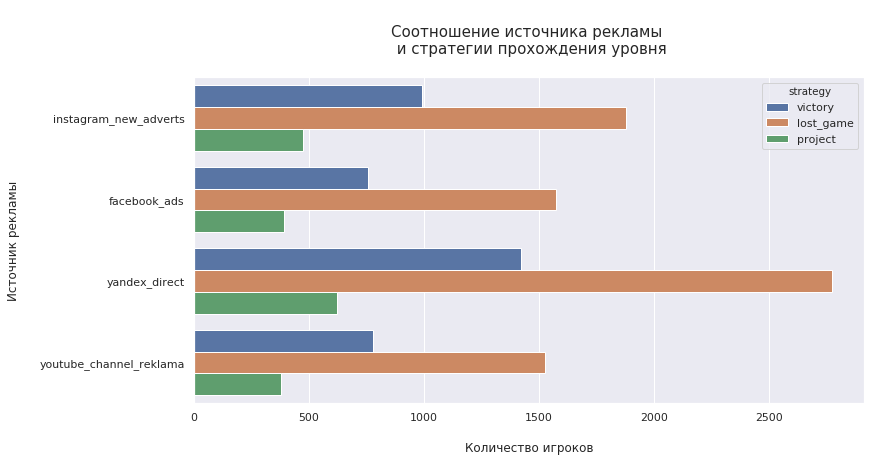

In [135]:
fig = plt.figure(figsize=(12,6))
sns.countplot(y='source', hue='strategy', data=source_to_strategy)
plt.title('\nСоотношение источника рекламы \n и стратегии прохождения уровня\n',fontsize=15) 
plt.xlabel("\nКоличество игроков")
plt.ylabel("Источник рекламы\n")
plt.show()

Вне зависимости от источника рекламы, игроки вдвое чаще завершают первый уровень победой над врагом,   
Реализации проекта отдают меньшее предпочтение все 

[План](#section_id_0) 

***

# 3. Статистические гипотезы 

## 3.1. Время завершения уровня различается в зависимости от способа прохождения <a id='section_id_61'></a>

Нулева гипотеза: Время завершения уровня, в зависимости от способа прохождения, `НЕ` различается 

Альтернативная гипотиза: Время завершения уровня, в зависимости от способа прохождения, различается

Уровень значимости alpha: 0,05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок

Если p-value будет меньше выбраного уровня значимости alpha, то нулевую гипотизу отвергаем.

Если p-value будет больше выбраного уровня значимости alpha, это будет значить, что данные не позволили нам отвергнуть нулевую гипотизу.

In [136]:
alpha = 0.05

results = st.ttest_ind(who_made_project['path_days'], who_made_victory['path_days'], equal_var = False)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, время завершения уровня различается")
else:
    print("Данные не позволили нам отвергнуть нулевую гипотизу")

p-значение:  2.6237027268062713e-106
Отвергаем нулевую гипотезу, время завершения уровня различается


In [137]:
who_concat.drop(0, axis=0).drop({'user_id', '%_of_total'}, axis=1)

,event,path_days
1,who_made_victory,11.0
2,who_made_project,13.0


Те, кто выбирают пройти первый уровень путем реализации проекта - проходят его дольше на 2 дня в сравнении с теми, кто прошел уровень победив первого врага

## 3.2. Время завершения уровня различается в зависимости от источника перехода <a id='section_id_62'></a>

In [138]:
source_merge

,source,finished_users,attracted_users,%_of_finished,cost,count,cac
1,instagram_new_adverts,1466,3347,0.438004,2161.0,3347,0.65
3,youtube_channel_reklama,1159,2686,0.431497,1068.0,2686,0.40
2,yandex_direct,2042,4817,0.423915,2233.0,4817,0.46
0,facebook_ads,1150,2726,0.421864,2141.0,2726,0.79


Сравним источники с самым высоким процентом прохождения **instagram_new_adverts** *43.8%*, и самым низким **facebook_ads** *42.1%*

Нулева гипотеза: Время завершения уровня, в зависимости от источника рекламы, `НЕ` различается 

Альтернативная гипотиза: Время завершения уровня, в зависимости от источника рекламы, различается

Уровень значимости alpha: 0,05

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок

Если p-value будет меньше выбраного уровня значимости alpha, то нулевую гипотизу отвергаем.

Если p-value будет больше выбраного уровня значимости alpha, это будет значить, что данные не позволили нам отвергнуть нулевую гипотизу.

In [139]:
facebook = users_first_last_event[['source', 'path_days']].query('source == "facebook_ads"')
instagram = users_first_last_event[['source', 'path_days']].query('source == "instagram_new_adverts"')

In [140]:
alpha = 0.05

results = st.ttest_ind(facebook['path_days'], instagram['path_days'], equal_var = False)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, время завершения уровня различается")
else:
    print("Данные не позволили нам отвергнуть нулевую гипотизу")

p-значение:  0.5529958757362929
Данные не позволили нам отвергнуть нулевую гипотизу


Время завершения уровня `не` различается, вне зависимости от источника рекламного перехода

[План](#section_id_0) 

# 4. Выводы и рекомендации 

### Отчет

Проведен анализ поведения игроков в мобильной игре «Космические братья»

Данные получены за период с 4 мая 2020 года по 5 июня 2020 года.  
Реклама закупалась 6 дней, с 3 мая 2020 года по 9 мая 2020 года.  
  
В результате анализа выявлено: 
 - Кол-во уникальных пользователей: 13576
 - Среднее кол-во пользователей в день: 1480
 ***
 - Среднее время, за которое пользователь совершает **победу над первым врагом**: `10 дней`
 - Среднее время, за которое пользователь **реализует проект**: `13 дней`
 - Среднее время, за которое пользователь **останавливается в прогрессе**: `9 дней`
 ***
 - `29%` пользователей прошли первый уровень **победой** над врагом. 
 - `14%` выбрали путь реализации **проекта**.  
 - `57%` пользователей остановились в прогрессе и **не прошли** первый уровень.  
 - `43%` пользователей **прошли** первый уровень 
*** 
 - Разницы в проценте прохождения первого уровня в зависимости от источника трафика нет
 - Рекламный источник не влияет на соотношение игроков завершивших уровень боем или проектом  
 - Есть статистически значимое различие времени прохождения уровня от выбранной стратегии. *(Те кто выбирают способ прохождения победу над первым врагом, проходят уровень быстрее)*
 - Статистически значимого влияния рекламного источника на время прохождения первого уровня не выявлено  


### Рекомендации  

Отвечая на вопрос, ***какую модель монетизации стоит выбрать для игрового приложения***, можно рассмотреть варианты:

- Ускорение строительства построек посредством просмотра рекламного баннера
- Разовые ускорители строительства построек за донат
- Покупка построек за донат
- Показ рекламного баннера в меню взаимодействия с постройкой
- Чтобы окупить затраты на рекламу, цену за показ рекламного баннера рекомендуется ставить не ниже, чем в данном CAC

- Соотношения, время и доли в прохождении игры ни как не зависят от рекламного источника, поэтому рекомендуется увеличить вложения в рекламный источник `youtube_channel_reklama`, его САС наименьший, он принесёт много *дешевых не менее качественных пользователей* .

[План](#section_id_0) 

<BR>